# Usage example for lmdiag
Source: https://github.com/dynobo/lmdiag

### Imports & Generate Linear Regression Model for Demo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
import lmdiag # the library used for visualizing the diagniostic plots

%matplotlib inline


Generating observation of size 30 from normal distribution, getting some response variable using some trasformations of predictor

In [4]:
np.random.seed(20)
predictor = np.random.normal(size=30, loc=20, scale=3)
response = 5 + 5 * predictor + np.random.normal(size=30)
X = sm.add_constant(predictor)

In [5]:
predictor # Now we have a predictor of size 30

array([22.65167934, 20.58759507, 21.07260955, 12.97021428, 16.74550224,
       21.67908887, 22.81840805, 17.06455687, 21.50929052, 21.21924341,
       20.97038303, 18.51976735, 17.62394963, 17.4728962 , 16.16149201,
       20.73714551, 19.8674156 , 24.70289766, 23.15332604, 21.21910528,
       19.4940617 , 10.43089163, 23.36039678, 23.99833462, 19.2699837 ,
       19.60990787, 19.67294789, 24.66855932, 20.38633506, 13.79915383])

In [9]:
response # We have the response variable of size 30 also

array([117.37290353, 106.83339585, 111.29591408,  71.91090942,
        87.79257323, 111.78245412, 119.61910997,  88.77168363,
       112.87606594, 109.95969049, 109.51342454,  97.91980756,
        92.51744012,  93.90920935,  86.45449416, 109.27894476,
       104.77510249, 129.87227731, 121.97114147, 112.44732257,
       102.96374572,  54.45009291, 121.24679809, 124.99318168,
       102.20701233, 104.53068298, 103.14507831, 129.84619475,
       105.44929024,  73.13960494])

In [10]:
X # X is just the transformation of predictor to be used in OLS model of statsmodels

array([[ 1.        , 22.65167934],
       [ 1.        , 20.58759507],
       [ 1.        , 21.07260955],
       [ 1.        , 12.97021428],
       [ 1.        , 16.74550224],
       [ 1.        , 21.67908887],
       [ 1.        , 22.81840805],
       [ 1.        , 17.06455687],
       [ 1.        , 21.50929052],
       [ 1.        , 21.21924341],
       [ 1.        , 20.97038303],
       [ 1.        , 18.51976735],
       [ 1.        , 17.62394963],
       [ 1.        , 17.4728962 ],
       [ 1.        , 16.16149201],
       [ 1.        , 20.73714551],
       [ 1.        , 19.8674156 ],
       [ 1.        , 24.70289766],
       [ 1.        , 23.15332604],
       [ 1.        , 21.21910528],
       [ 1.        , 19.4940617 ],
       [ 1.        , 10.43089163],
       [ 1.        , 23.36039678],
       [ 1.        , 23.99833462],
       [ 1.        , 19.2699837 ],
       [ 1.        , 19.60990787],
       [ 1.        , 19.67294789],
       [ 1.        , 24.66855932],
       [ 1.        ,

### Print all the Plots as Matrix 
Fittin the OLS line to the data to figure out the diagnostics plots for analysis(You might want to set size beforehand, otherwise it's really tiny)

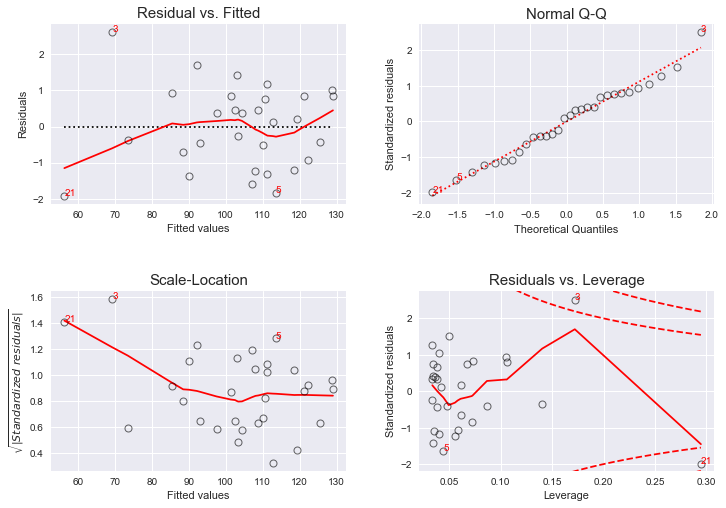

In [6]:
statsmodels_lm = sm.OLS(response, X).fit() #OLS fit
plt.style.use('seaborn') # plotting using seaborn
plt.figure(figsize=(10,7))
lmdiag.plot(statsmodels_lm) # plotting the diagnostic plots using lmdiag library

### Same with `linearmodels`

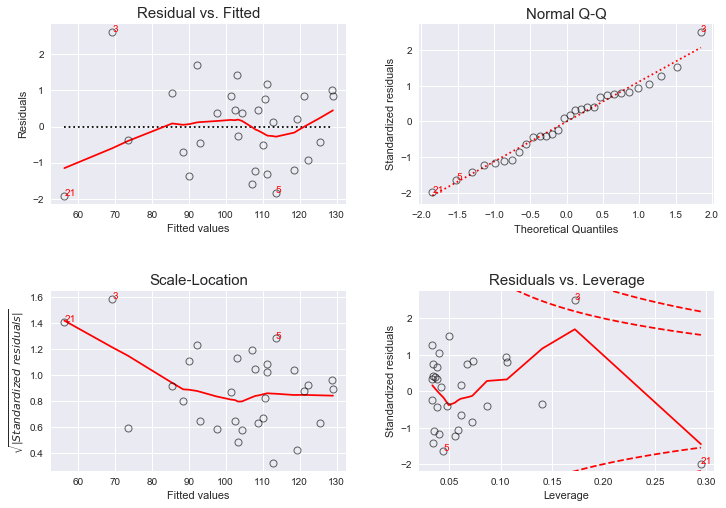

In [7]:
linearmodels_lm = IV2SLS(response,X, None, None).fit(cov_type='unadjusted') # fitting Regression Line using linearmodels
plt.figure(figsize=(10,7))
lmdiag.plot(linearmodels_lm);

### Plot the charts individually

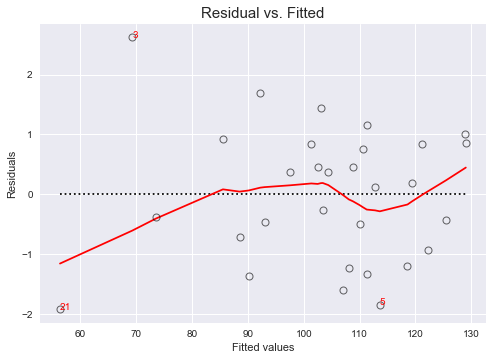

In [8]:
lmdiag.resid_fit(statsmodels_lm);

In [9]:
lmdiag.info('resid_fit') # printing the infor for a given plot

        Name: Residuals vs. Fitted
      Method: lmdiag.resid_fit(lm)
      x-Axis: Fitted Values (The dependent variable of your model; What you
              threw in statsmodels OLS as 1st parameter)
      y-Axis: Residuals (The "error" of the model; Distance to the fitted
              regression line)
 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.



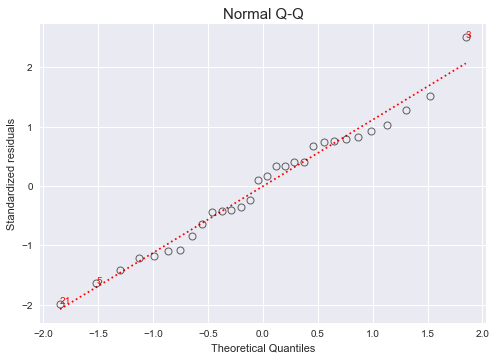

In [10]:
lmdiag.q_q(statsmodels_lm) # visualizing QQ prot

In [11]:
lmdiag.info('q_q') # printing the information about QQ prot

        Name: Normal Q-Q
      Method: lmdiag.q_q(lm)
      x-Axis: Theoretical Quantiles (Quantiles from the Normal Distribution)
      y-Axis: Standardized residuals (Quantiles of the values of hte dependent
              variable in sorted order)
 Description: It's purpose is to check, if the residuals are following a normal
              distribution. It's good, if the points are aligned on the dashed
              line. If only a few points are off, take a look at the other
              plots. If lot's of points do not follow the line, your
              distribution might be off normal, e.g. regarding skew, tails or
              modality.



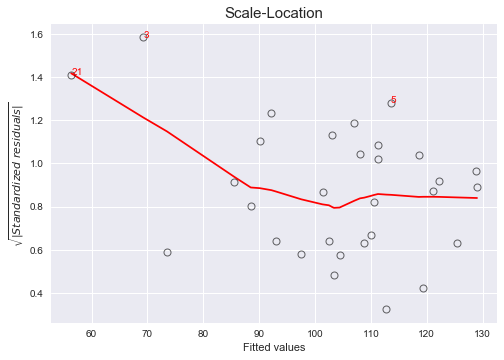

In [12]:
lmdiag.scale_loc(statsmodels_lm) # visualizing scale location prot

In [13]:
lmdiag.info('scale_loc') # printing the information about QQ prot

        Name: Scale-Location
      Method: lm.scale_loc(lm)
      x-Axis: Fitted Values (The dependent variable of your model; What you
              threw in statsmodels OLS as 1st parameter)
      y-Axis: Squareroot of the absolute value of the Standardized Residuals.
 Description: It's purpose is to check "homoscedasticity" the assumption of
              equal variance. The plot shows, if the residuals are spread
              equally accross the range of predictors (Fitted values). The red
              line should be horizonzal and the scatter points equally spread
              in a random matter. The red labels are the indices of the
              observations with the highest absolute residuals.



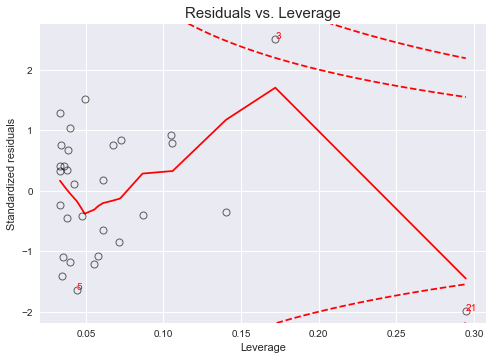

In [14]:
lmdiag.resid_lev(statsmodels_lm);

In [15]:
lmdiag.info('resid_lev')

        Name: Residuals vs. Leverage
      Method: lmdiag.resid_lev(lm)
      x-Axis: Leverage (The "influence" of an observation. A measure of how far
              away the dependend variables value of an observation is from
              those of other observations.)
      y-Axis: Residuals (The "error" of the model; Distance to the fitted
              regression line)
dashed-Lines: Cook' Distance, 0.5 (inner) and 1 (outer).
 Description: It's purpose is to identify observations with high influence on
              calculating the regression. Those oberservation might but not
              have to be outliers, they are just extreme cases concerning the
              regression. The pattern of the scatter points is not relevant
              here: interesting are observations in the top right and bottom
              right of the plot. If we have cases outside the Cook's Distance
              (dashed lines), removing those would have an high impact on our
              regression l

### Print useful descriptions for interpretation

**For all available charts:**

In [16]:
lmdiag.info()

        Name: Residuals vs. Fitted
      Method: lmdiag.resid_fit(lm)
      x-Axis: Fitted Values (The dependent variable of your model; What you
              threw in statsmodels OLS as 1st parameter)
      y-Axis: Residuals (The "error" of the model; Distance to the fitted
              regression line)
 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

        Name: Normal Q-Q
      Method: lmdiag.q_q(lm)
      x-Axis: Theoretical Quantiles (Quantiles from the Normal Distribution)
      y-Axis: Standardized residuals (Quantiles of 